# Credit Card Marketing Segmentation Using K-Means Clustering and PCA

## Project Description

This project aims at leveraging machine learning algorithms to perform marketing segmentation. The segmentation centers on a bank's credit card customers. After cleaning, preparing, and analyzing a dataset containing information about the bank's credit card customers, I proceed to employ *K-means clustering* to segement the customers into distinct groups with similar features. Afterwards, I apply *Principal Component Analysis* on the data. Finally, I conclude the project and visualize the results.

## Acknowledgements

Special thanks to Arjun Bhasin for providing the dataset. The dataset was accessed in November 2020, and it can be downloaded here:
https://www.kaggle.com/arjunbhasin2013/ccdata

## Business Case and Problem

**Case**: A bank wants to organize their credit card customers into several groups of customers with shared features to assist them in developing targeted marketing advertisement campaigns. The bank wants to sort customers by specific behaviors and dispositions like spending, repaying balances, making cash advance transactions, and tenure (i.e., the amount of time a customer has had an active credit card with the bank). The groups that are of primary interest are the following:
1. A **lucrative** group composed of customers who make numerous cash advance transactions and who have large balances (these customers pay a lot of interest and bring in more revenue).
2. A **conservative** group composed of customers with low balances and who make a small number of cash advance transactions.
3. A **top-tier** group composed of customers who have the biggest lines of credit and who also frequently pay off their balances.
4. A **developing** group composed of new members or customers who have a low tenure.

**Problem:** We need to gather, clean, and process data containing information about the bank's credit card customers to leverage machine learning algorithms that will assist us in the development of marketing segmentation. We need to group the customers into several clusters and identify those clusters composed of (1) **lucrative** customers, (2) **conservative** customers, (3) **top-tier** customers, and (4) **developing** customers.

## Strategy and Methodology

**Strategy:** I will employ an unsupervised machine learning algorithm called "K-Means clustering" to segment the credit card customers into distinct groups with shared features. From those groups, I will attempt to identify the 4 customer groups of primary interest: the **lucrative** group, the **conservative** group, the **top-tier** group, and the **developing** group.

**Methodology:** I will utilize several data science tools, techniques, and methods to carry out the strategy and solve the business problem. This project will proceed as follows.
1. Import librariers and data.
2. Perform initial exploratory data analysis and visualizations.
3. Clean and process the data for further analysis and the application of the K-means clustering algorithm.
4. Determine the optimal number of clusters using the *elbow method*.
5. Train and implement the K-means clustering algorithm.
6. Locate and identify the clusters that contain the groups of primary interest.
7. Use the machine learning algorithm referred to as "Principal Component Analysis" to perform dimensionality reduction.
8. Visualize the clusters.
9. Summarize the project and the results.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

print("Libraries imported")

Libraries imported


## Import the Data

In [69]:
# Importing the credit card csv file and creating a new pandas dataframe
credit_file = "C:/Users/adams/Desktop/Data Science/Datasets/credit.csv"
credit_df = pd.read_csv(credit_file)

In [70]:
# Display the first five rows of the dataframe, credit_df
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [71]:
# Examine the data
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Observation:** There are null values. I will deal with those values later in the data cleansing section.

## Exploratory Data Analysis

Initial data exploration and visualization

### Customer Balances

In [72]:
# Let's get the average for BALANCE
print("average = ", credit_df["BALANCE"].mean())

average =  1564.4748276781038


In [73]:
# The minimum value for BALANCE
print("min = ", credit_df["BALANCE"].min())

min =  0.0


In [74]:
# The maximum value for BALANCE
print("max = ", credit_df["BALANCE"].max())

max =  19043.13856


### Summary Statistics

In [75]:
# Use the describe() method to get more statistical insights
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Observations:** Most of the data makes sense and the *mean*, *min*, and *max* values match the values I got above.

**Further Examinations:**
1. Let's take a closer look at the customer that spent $40,761.25 on a one-off purchase.
2. Let's look at the person who made the maximum amount for *purchases*.
3. Let's see who has the biggest credit limit.
4. Let's look at the customer that made the maximum cash advance transaction. 
5. For the person with the maximum cash advance transaction: (A) how many cash advance transactions were made? and (B) how often did she/he pay her/his bill?

In [76]:
# Locate the customer with the largest one-off purchase
credit_df[credit_df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [77]:
# The maximum purchase amount
credit_df["PURCHASES"].max()

49039.57

In [78]:
# Locate the person who made the biggest purchase
credit_df[credit_df["PURCHASES"] == 49039.57]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [79]:
# The biggest credit limit
credit_df["CREDIT_LIMIT"].max()

30000.0

In [80]:
# Locate the person with the biggest credit limit
credit_df[credit_df["CREDIT_LIMIT"] == 30000.0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4905,C15041,1409.256223,0.900000,4569.65,1748.94,2820.71,3883.517967,0.700000,0.6,0.600000,0.4,5,24,30000.0,5772.813158,472.103929,0.00,10
7046,C17237,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.5,0.083333,0.0,0,33,30000.0,30029.014960,11853.796130,0.75,12


**Observations:** We see that there are two people with the credit limit of 30000.00. We can also note the differences in their respective purchasing and paying behavior. For instance, the individual with customer ID C17237 made 26784.62 worth of purchases. This is far more than the other individual with customer ID C15041 who only made 4569.65 worth of purchases. On the other hand, customer C15041 made Cash Advance transactions worth around 3883.52, whereas customer C17237 didn't make any Cash Advance transactions.

In [81]:
# What is the maximum value for Cash Advance?
credit_df["CASH_ADVANCE"].max()

47137.211760000006

In [82]:
# Locate the customer that made the maximum cash advance transaction
credit_df[credit_df["CASH_ADVANCE"] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


**Observation:** We can see that they made 123 *Cash Advance* transactions. We also see that they don't pay their bill in full given the 0.0 value under *Percent Full Payment* column. This type of customer pays a lot of interest and is therefore a good source of revenue for the bank.

### Correlation

In [83]:
# Display the correlation values
credit_df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


### Data Visualizations

Let's create some visualizations that will provide us with more insight

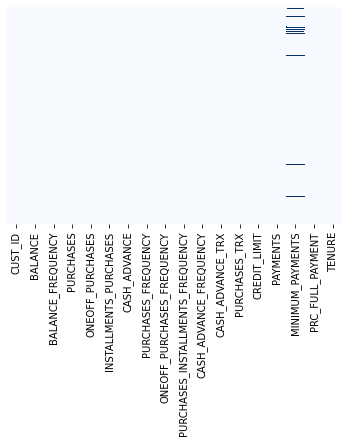

In [84]:
# heatmap to visualize any null values in the data
sns.heatmap(credit_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

**Observation:** We can see that we have some missing values. Our heat map shows that there are quite a few missing values under the *Minimum Payments* column. But there could be more missing values that don't clearly show up in the visualization. We can use *isnull().sum()* to return every missing value in every column.

In [85]:
# Let's get a more accurate diagnosis concerning our missing values
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Note:** I'll have to deal with the missing values in both *Minimum Payments* and *Credit Limit*.

#### Distribution Plot

Let's create a distribution plot. But before we can do that, let's drop the *Cust ID* column given that it is not relevant.

In [86]:
# Create a new dataframe, df, in which we drop the 'Cust ID' column
df = credit_df.drop("CUST_ID", axis = 1)
# Display the dataframe
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [87]:
# Find the length or number of columns
n = len(df.columns)
n

17

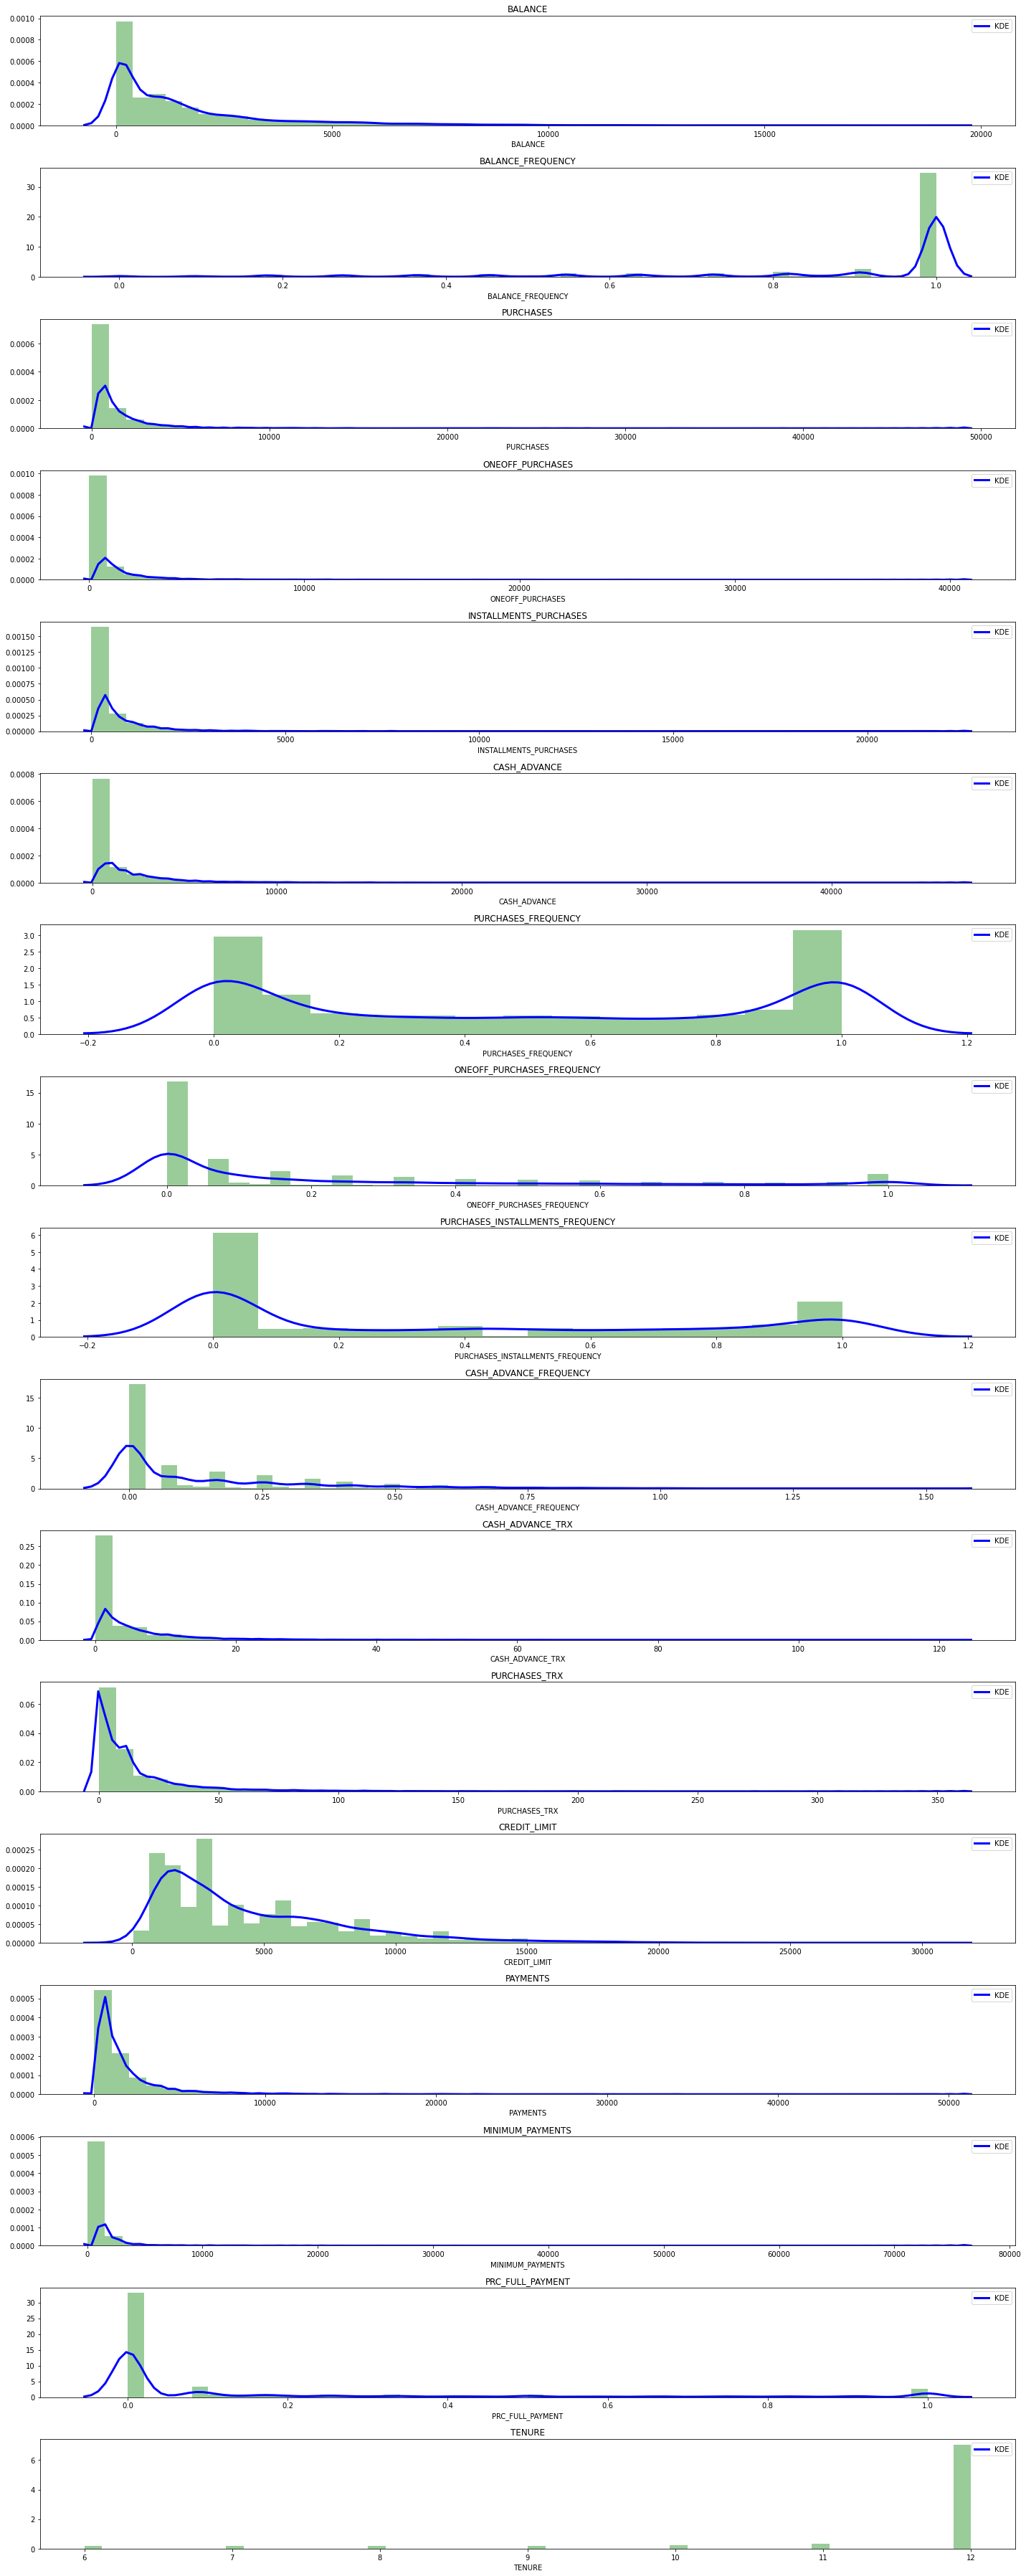

In [88]:
import warnings
warnings.filterwarnings("ignore")

# Create the distribution
plt.figure(figsize = (20, 50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color":"b", "lw":3, "label":"KDE"}, hist_kws={"color":"g"})
    plt.title(df.columns[i])
    
plt.tight_layout()

**Remarks:** Note that I have plotted histograms and KDE plots for each feature. KDE Plots depict the Kernel Density Estimate. KDE visualizes the probability density of a continuous variable. It shows the probability density at different values in a continuous variable. 


**Observations:** We note several interesting aspects of our data. First, we only have a small amount of customers that pay in full. That is to say, the vast majority of customers routinely pay interest. Second, most of our customer tenure is around 12 years. Third, the average for *Balance* is around 1,500. Fourth, when it comes to *Purchase Frequency*, we see separate groupings of customers where one groups is low (around zero) and the other is high (around 1). Fifth, the frequencies for *One Off Purchases* and *Purchase Installment Frequency* is low - i.e., they're closer to zero.

#### Correlation Matrix

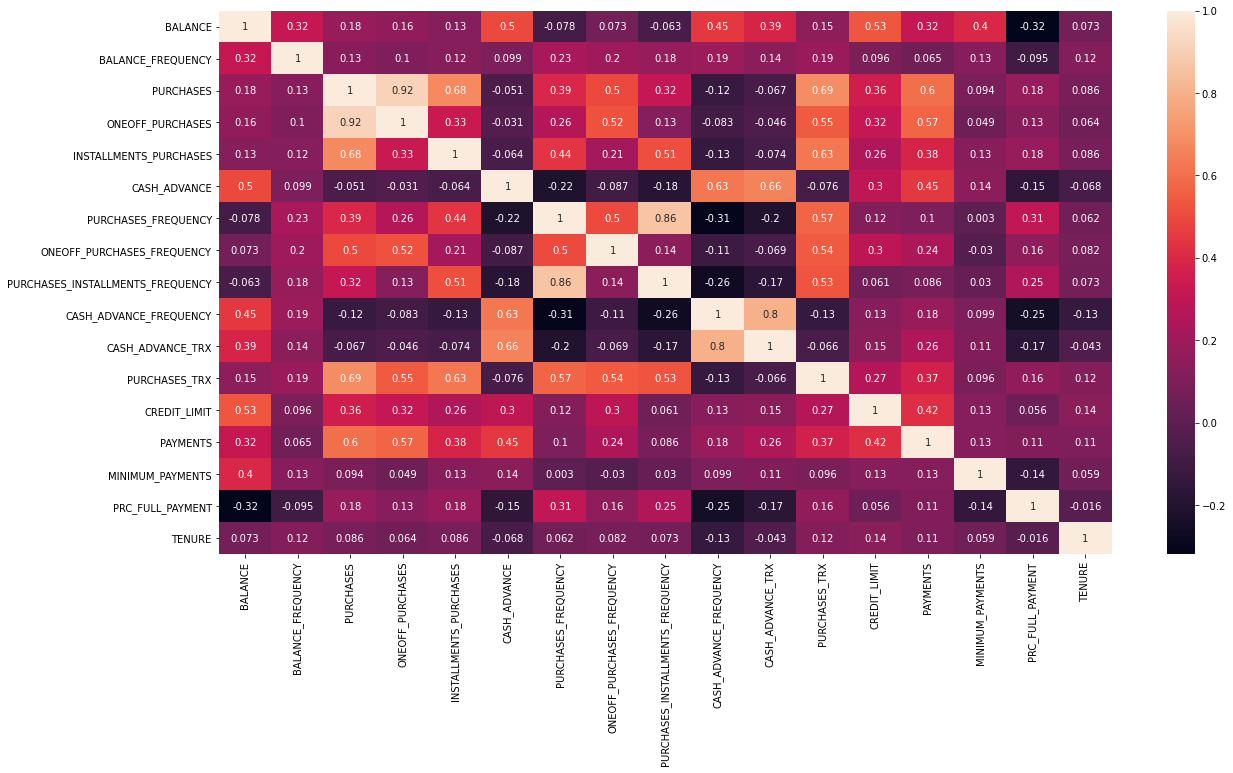

In [89]:
# Plot a correlation matrix based on the correlation values between variables
correlations = df.corr()

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, annot=True)

**Observations:** We can see several interesting correlations. Let us briefly note a few correlations of interest. First, *Purchases* has a high correlation (0.92) with *One Off Purchases*. *Purchases* is also highly correlated with *Purchase Transactions* (.69).

## Data Cleansing and Processing

I'll handle missing values, drop irrelevant columns, correct any data formatting issues, and standardize the data. This will prepare the data for machine learning.

### Dealing with Missing Values

In [90]:
# Impute missing values using the mean
df = df.fillna(df.mean())

In [91]:
# Check the missing values
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [92]:
# Re-check the summary statistics
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Handle Duplicates 

First I need to check if there are any instances of duplicate data. If there is, then I will need to eliminate the duplicates.

In [93]:
# Check for any duplicates in the data
df.duplicated().sum()

0

Good. There are no duplicate rows.

### Filtering columns

We dropped the *Cust ID* column. Let's check to see if there are other features that are not relevant.

In [94]:
# Recall the columns
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In this case, we can keep the rest of the columns.

### Check Data Types

In [95]:
# Use dtypes to check the specific types of data
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [96]:
# Let's convert all columns to floats
df["CASH_ADVANCE_TRX"] = df["CASH_ADVANCE_TRX"].astype(float)
df["PURCHASES_TRX"] = df["PURCHASES_TRX"].astype(float)
df["TENURE"] = df["TENURE"].astype(float)

In [97]:
# Ceck the data types again
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
dtype: object

In [98]:
# Check the first five rows
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [99]:
# Check the shape of the dataframe, df
df.shape

(8950, 17)

### Data Normalization

I'll now scale the data. This will help with machine learning.

In [100]:
# Use StandardScaler to scale the data and create a new NumPy array, df_scaled
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [101]:
# Check the shape of the new dataframe
df_scaled.shape

(8950, 17)

In [102]:
# Check the array
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Unsupervised Machine Learning Using K-Means

In this section I will us K-means to cluster the data. K-means is an unsupervised machine learning algorithm. It will locate and cluster observations that share similar attribute values by measuring the euclidean distance between points of data.

### Methodology

1. Determine the number of clusters, *k*. 
2. Randomly select *k* points that serve as *centroids* for the clusters.
3. Assign the data points to its nearest centroid resulting is *k* clusters of data points.
4. Calculate a new centroid for each cluster.
5. Reassign data points to their nearest cluster resulting in *k* clusters.
6. Continue calculating new centroids and reasssigning data points to their nearest centroids.

### Determine the number of clusters, *k*

To determine *k* (i.e., the number of clusters) I will employ the **Elbow Method**. This relies on the values when calculating the *within cluster sum of squares* (WCSS) for different possible clusters.

#### Calculate WCSS Scores Using the *df_scaled* Array

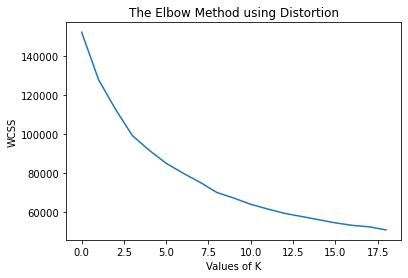

In [103]:
# Create a for loop to calculate the WCSS scores for possible clusters

scores = [] # the list to contain the calculated WCSS scores

range_values = range(1,20) # the range of possible clusters (1-20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_) # append the WCSS scores to the 'scores' list using inertia

# make a plot to visualize the scores and to help identify the optimal k

plt.plot(scores)
plt.xlabel('Values of K') 
plt.ylabel('WCSS') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

**Observation:** We see the curve becoming more linear around 10 clusters. It therefore seems that the optimal number of clusters is between 7 and 8.

###  Applying K-Means Clustering

Given our observation above, I will initially assign 7 to *k*. I will now apply the K-Means algorithm.

In [104]:
# Train the model and create a kmeans object with 8 clusters and feed it the data, 'df_scaled'
kmeans = KMeans(7)
kmeans.fit(df_scaled)

# labels or clusters associated with each data point
labels = kmeans.labels_

In [105]:
# The shape of the array indicating 8 clusters
kmeans.cluster_centers_.shape

(7, 17)

In [106]:
# Create a dataframe consisting of the kmeans.cluster_centers with headers from the column names of the dataframe, df
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])

# Display the dataframe
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.666473,0.392099,-0.205327,-0.149913,-0.210162,1.990753,-0.456789,-0.190269,-0.404044,1.908547,1.922104,-0.241414,1.007587,0.834821,0.552973,-0.391161,0.069807
1,-0.701872,-2.134325,-0.306924,-0.230292,-0.302515,-0.323078,-0.547138,-0.427951,-0.441452,-0.522249,-0.376815,-0.416568,-0.172739,-0.201746,-0.257554,0.295010,0.200781
2,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
3,0.007813,0.402983,-0.343915,-0.225214,-0.399316,-0.104212,-0.810261,-0.336386,-0.752275,0.084852,-0.041723,-0.464616,-0.301035,-0.248908,-0.015791,-0.452844,0.272305
4,-0.368601,0.330195,-0.040170,-0.235565,0.337616,-0.368799,0.980653,-0.360545,1.174008,-0.479340,-0.363350,0.173171,-0.278111,-0.222296,-0.015749,0.308438,0.251943
5,0.126924,0.430008,0.936481,0.893318,0.573104,-0.308187,1.092347,1.870640,0.535516,-0.407954,-0.319396,1.194797,0.698390,0.383921,-0.057307,0.454050,0.307809
6,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765


In [107]:
# Scale the data back using inverse transformation to make sense of these numbers and set it to a dataframe
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])

# Display the dataframe
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5033.096672,0.970155,564.520447,343.613277,221.020895,5153.573564,0.307019,0.145697,0.203860,0.517064,16.365772,8.709172,8160.463697,4149.870001,2152.885952,0.039307,11.610738
1,103.587241,0.371669,347.456361,210.199629,137.506773,301.361116,0.270757,0.074792,0.188993,0.030637,0.677338,4.355518,3865.955724,1149.108580,263.988609,0.240000,11.786015
2,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
3,1580.736068,0.972734,268.425678,218.628807,49.971063,760.334088,0.165154,0.102107,0.065464,0.152124,2.964097,3.161211,3399.161094,1012.580763,827.406808,0.021266,11.881732
4,797.263206,0.955491,917.380328,201.448217,716.369780,205.481926,0.883934,0.094900,0.831018,0.039223,0.769231,19.014209,3482.567468,1089.617947,827.503699,0.243928,11.854483
5,1828.656208,0.979136,3004.010071,2075.162956,929.318813,332.589357,0.928762,0.760506,0.577265,0.053509,1.069182,44.408019,7035.477416,2844.557734,730.654231,0.286516,11.929245
6,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243


**Note:**
1. first customer cluster = those that pay least amount of interest charges (transactors) and have the lowest balance (104) and cash advance (340)
2. second customer cluster = those that use their credit card as a loan (the most lucrative - so they are the revolvers), and tend to have the highest balance (5000) with high cash advance (5000), with high cash advance frequency (around .5), and high cash advance transactions (around 16). So they use their cards as like loans.
3. third cluster = highest credit limit (16 K) and highest percentage of full payment (around 0.51) - (the vip/prime members) - see id 4.
4. fourth cluster = customers with low tenure (7 years) and low balance (866) - (these are the low tenure).

In [108]:
# Labels associated with each data point
labels.shape

(8950,)

In [110]:
# max value of labels
labels.max()

6

In [111]:
# min value of labels
labels.min()

0

In [112]:
# Apply the fit_predict method to kmeans and feed it the 'df_scaled' array to get the output, 'y_kmeans'
y_kmeans = kmeans.fit_predict(df_scaled)

# Display y_kmeans
y_kmeans


array([2, 6, 4, ..., 5, 5, 5])

In [115]:
# Let's concatenate our cluster labels to the original dataframe, 'df', to create a new dataframe, 'df_cluster'
df_cluster = pd.concat([df, pd.DataFrame({"CLUSTER":labels})], axis = 1)

# Display the first five rows of the new dataframe with the labels
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,3


### Visualizations

I can create histograms that show the distributions of features for individual clusters.

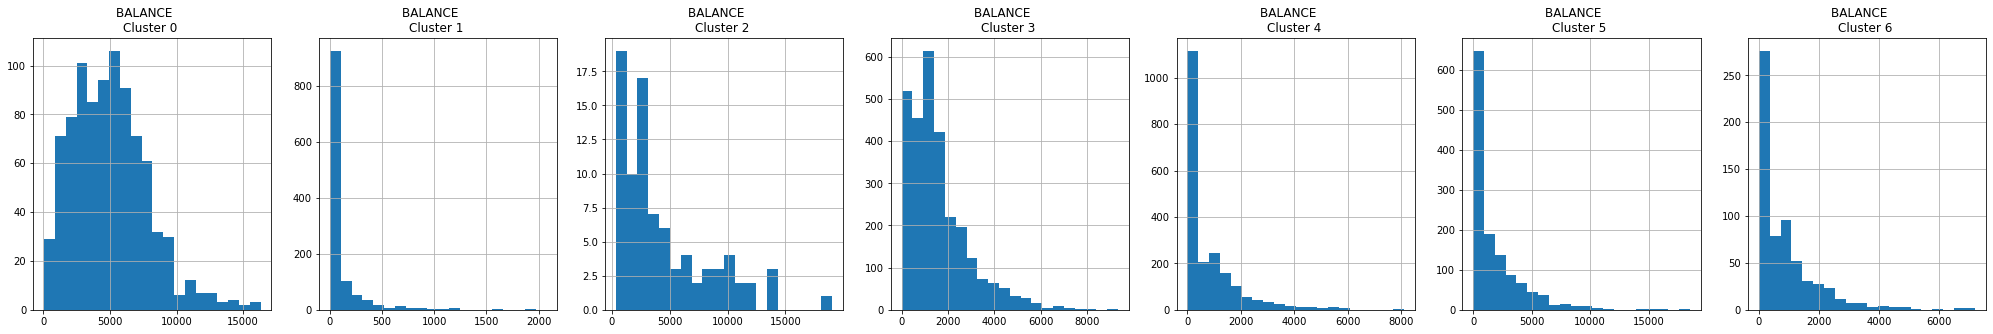

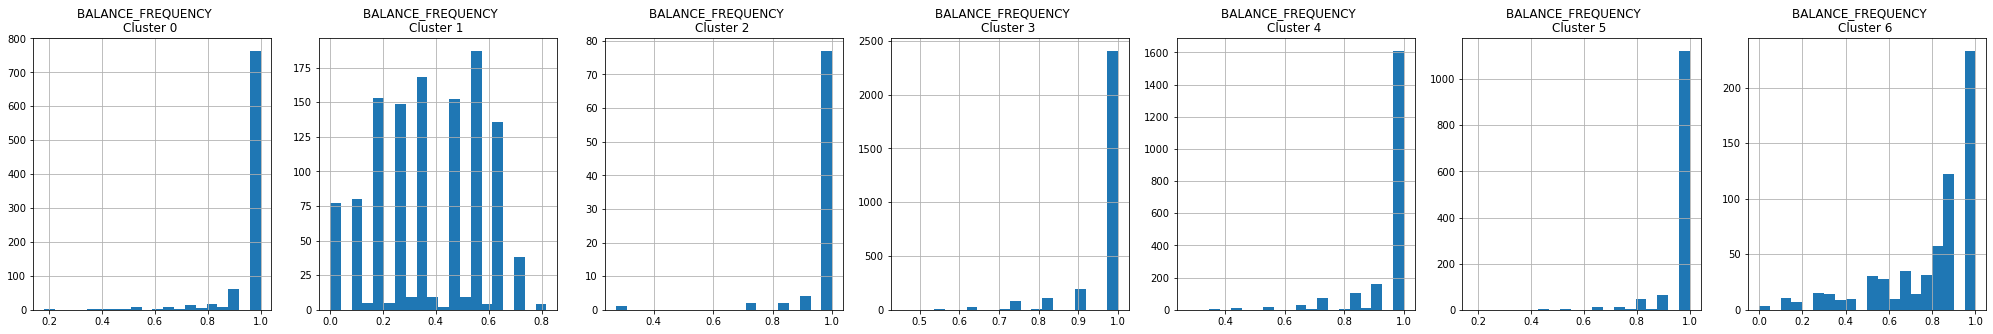

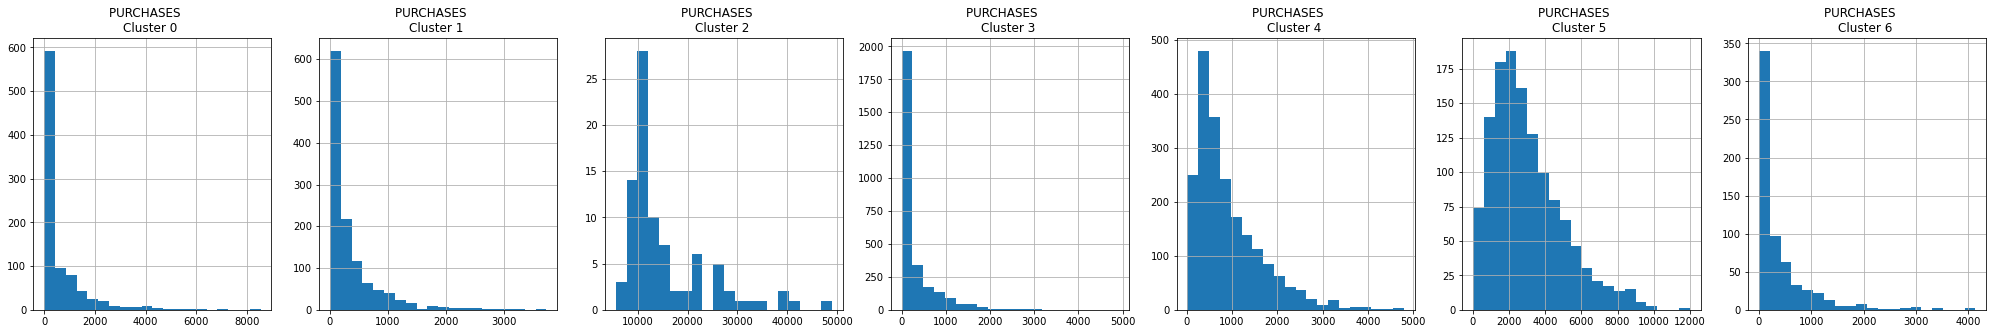

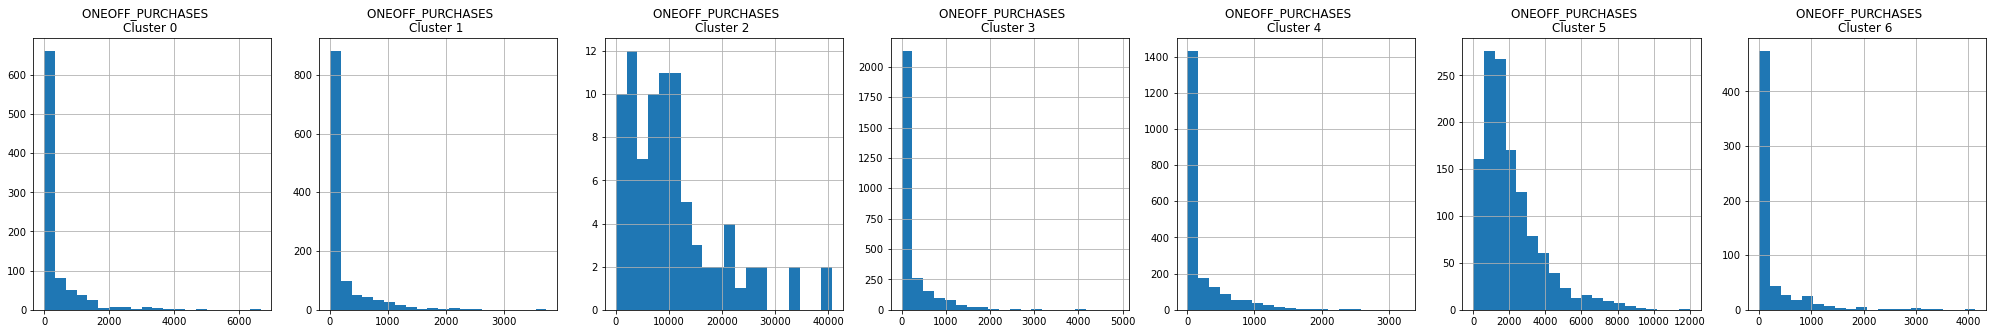

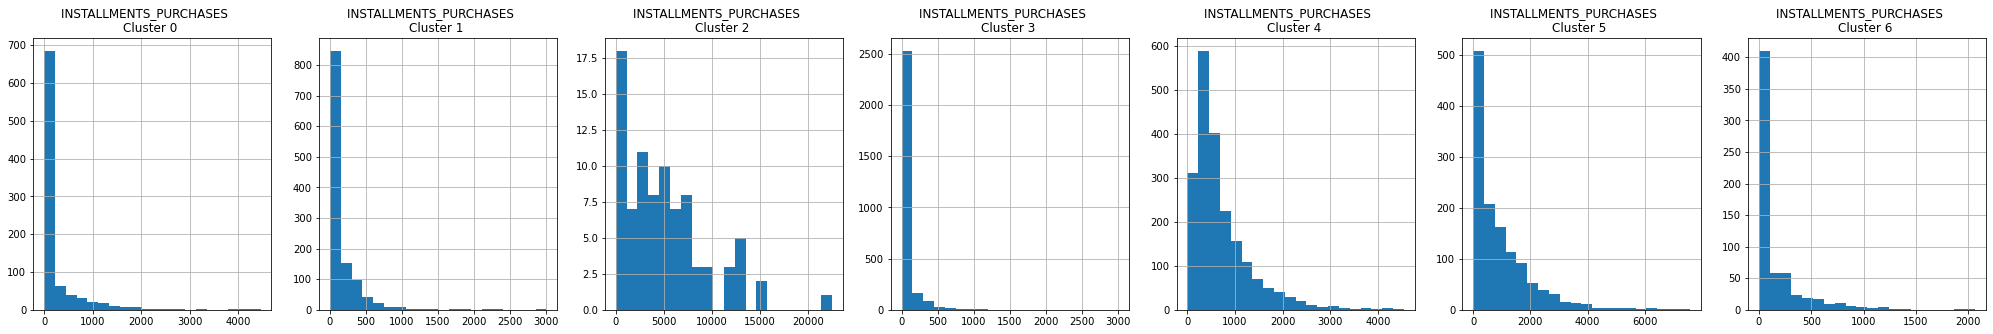

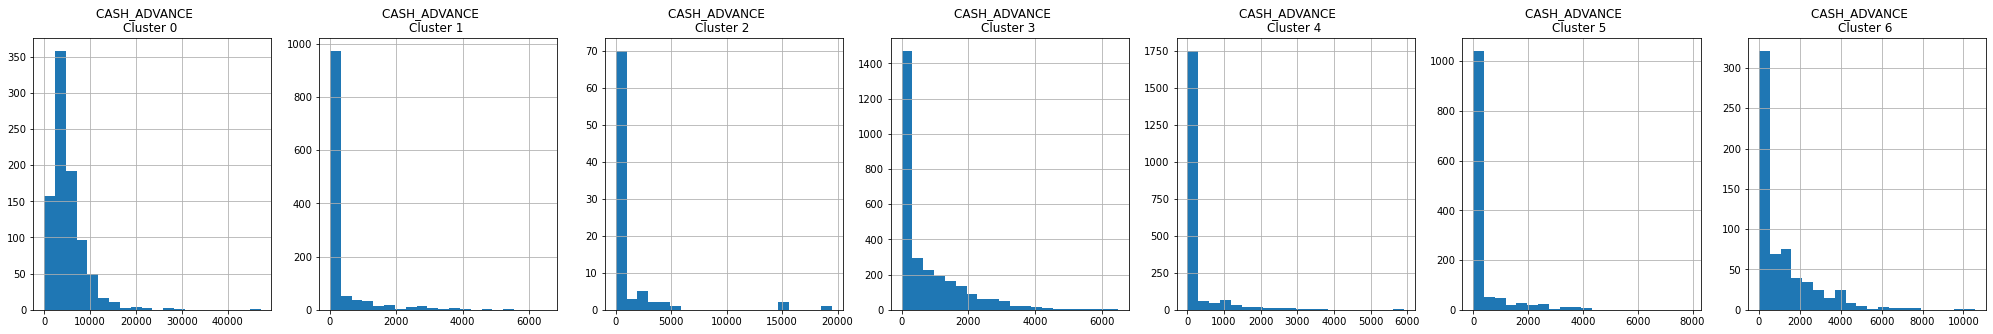

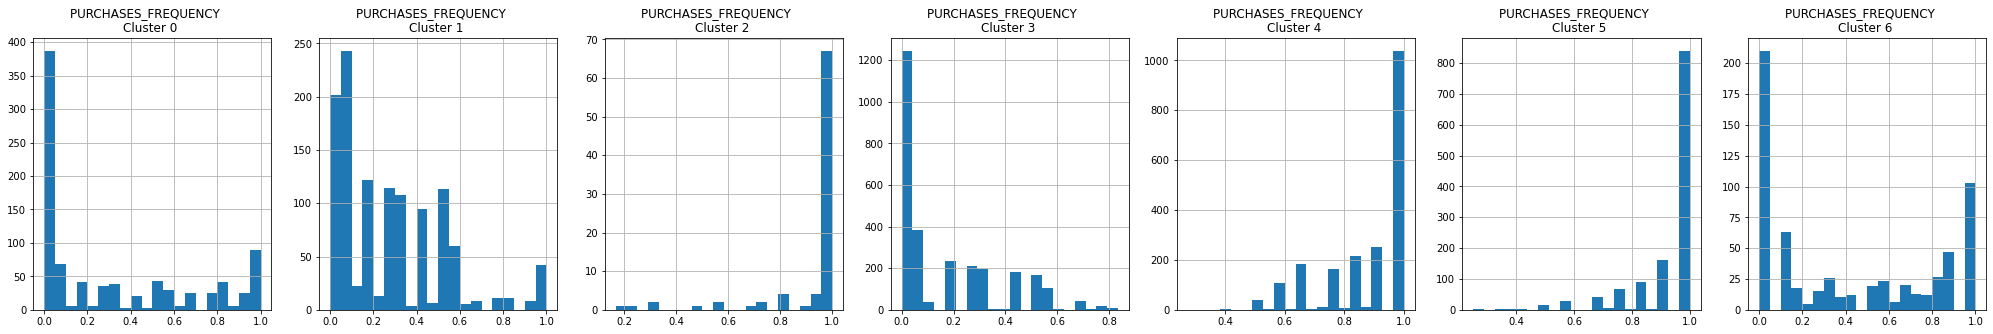

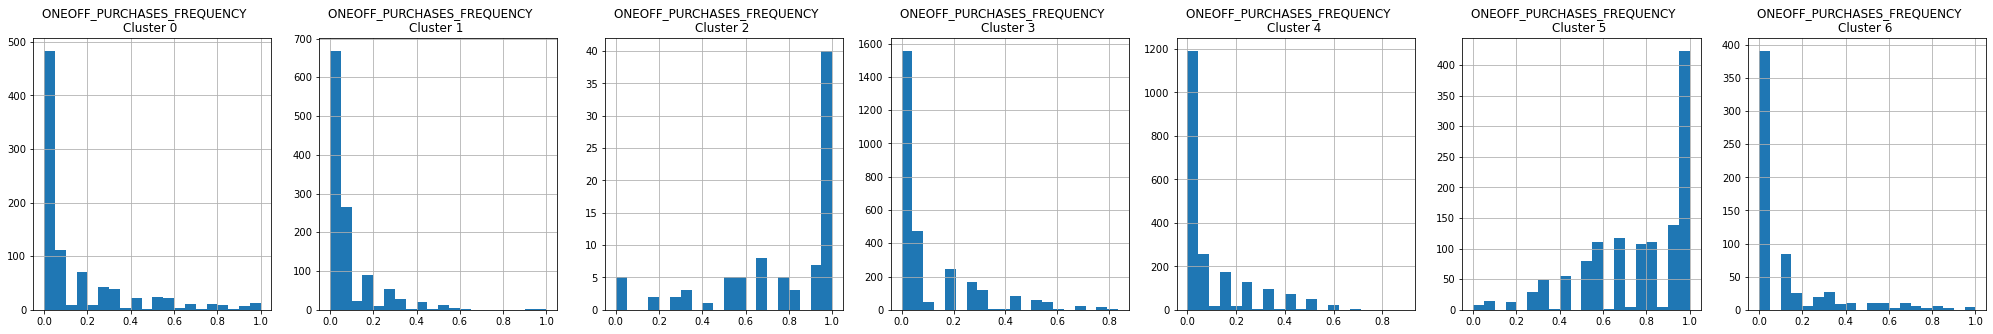

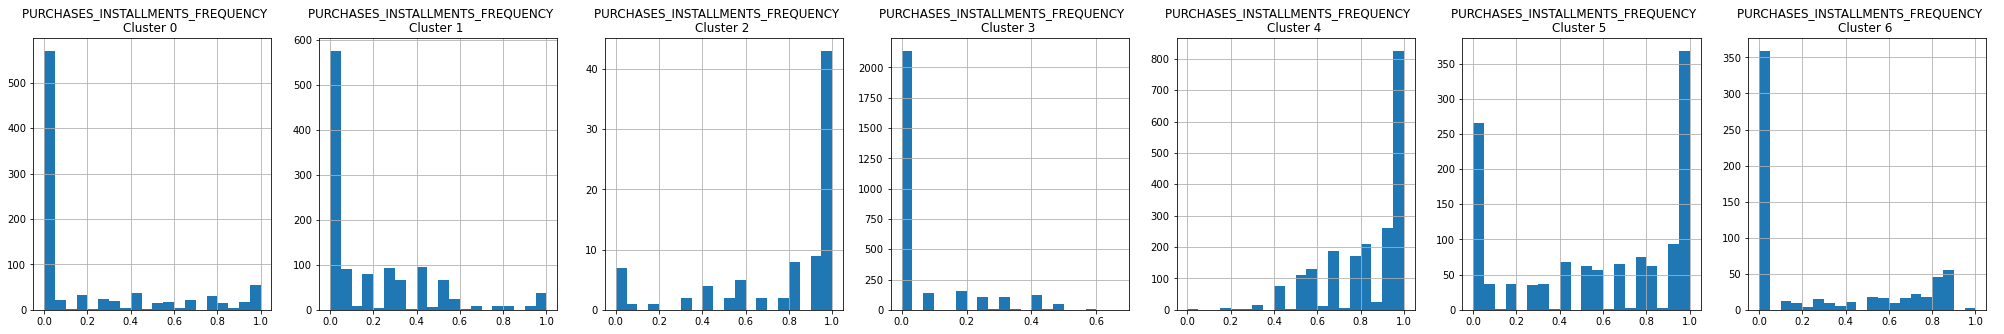

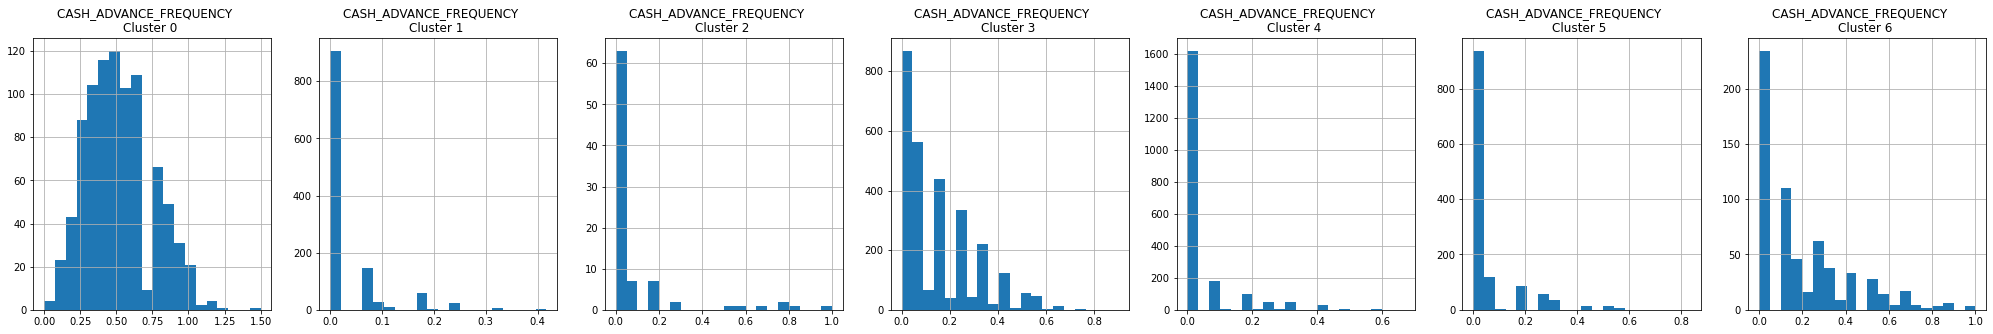

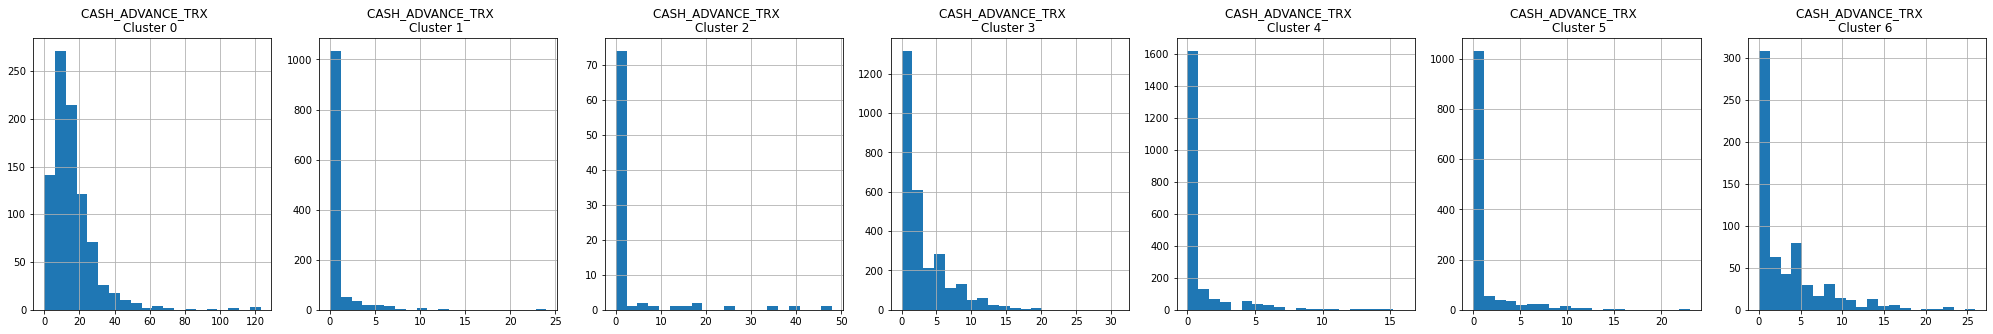

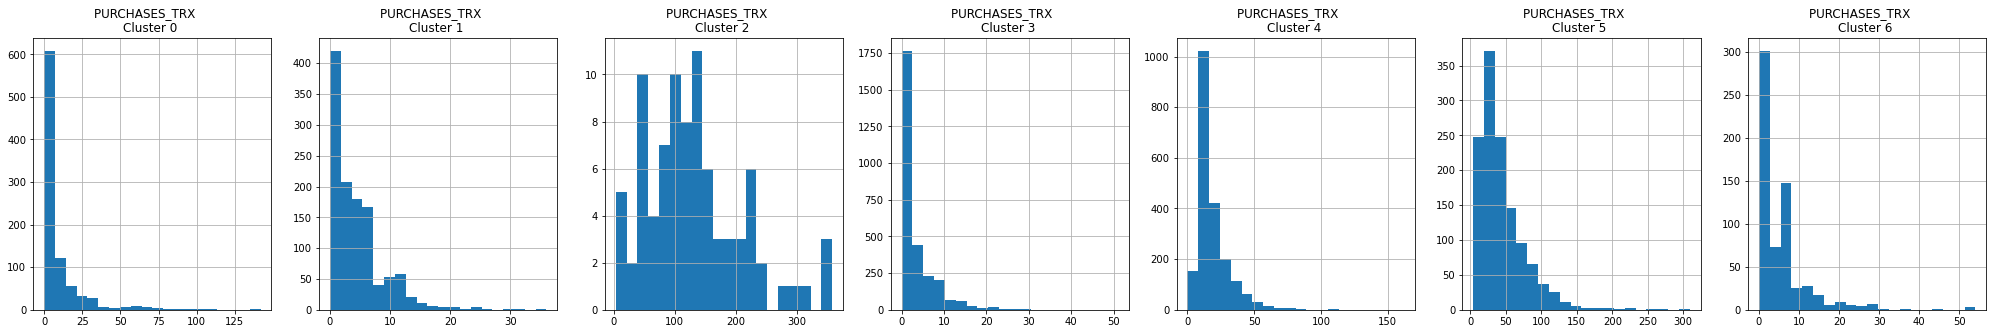

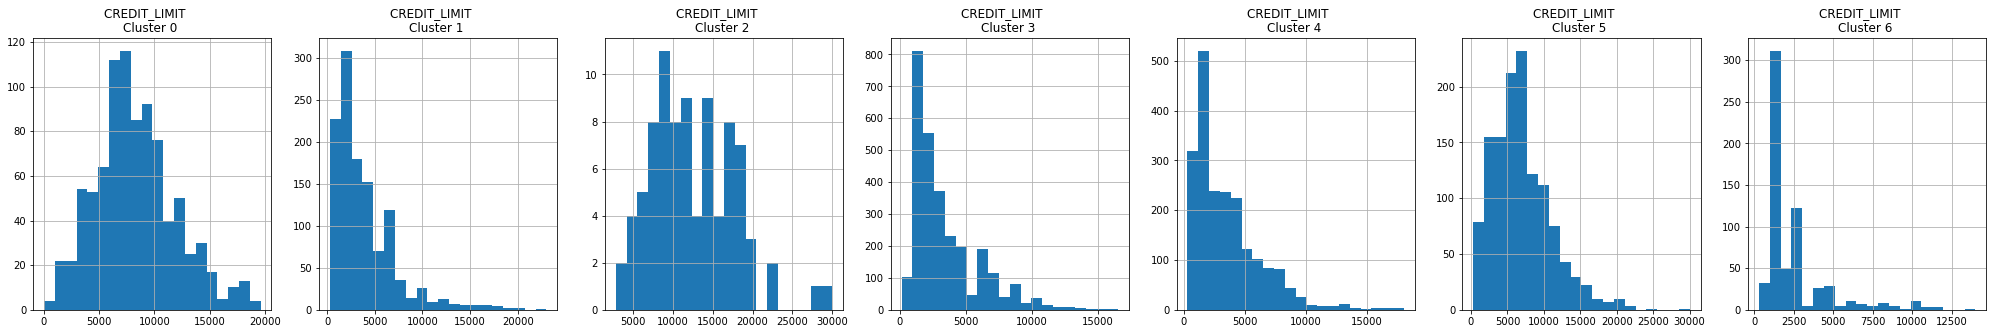

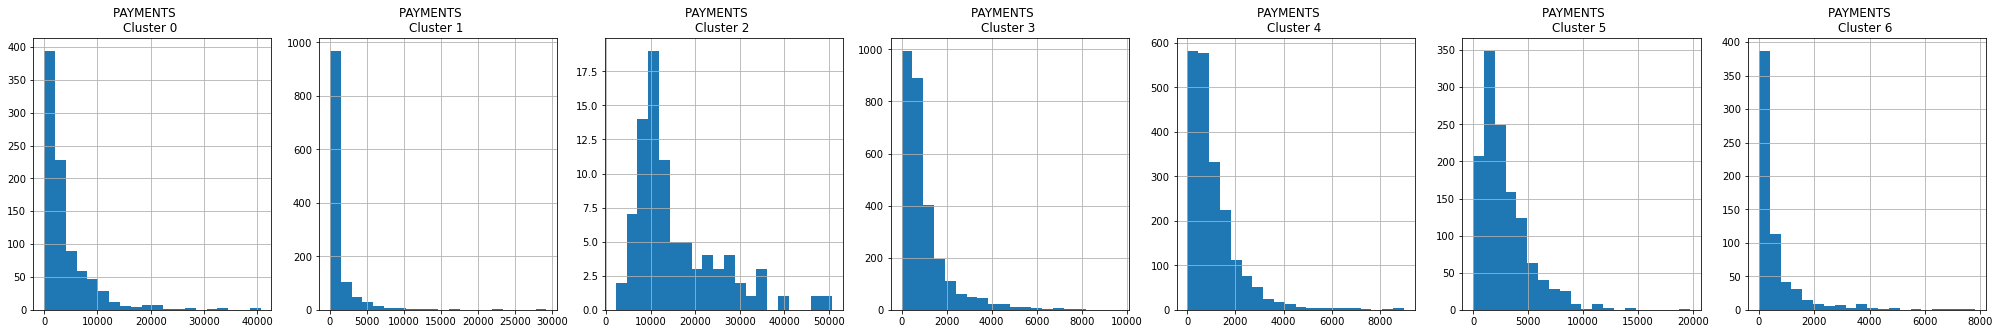

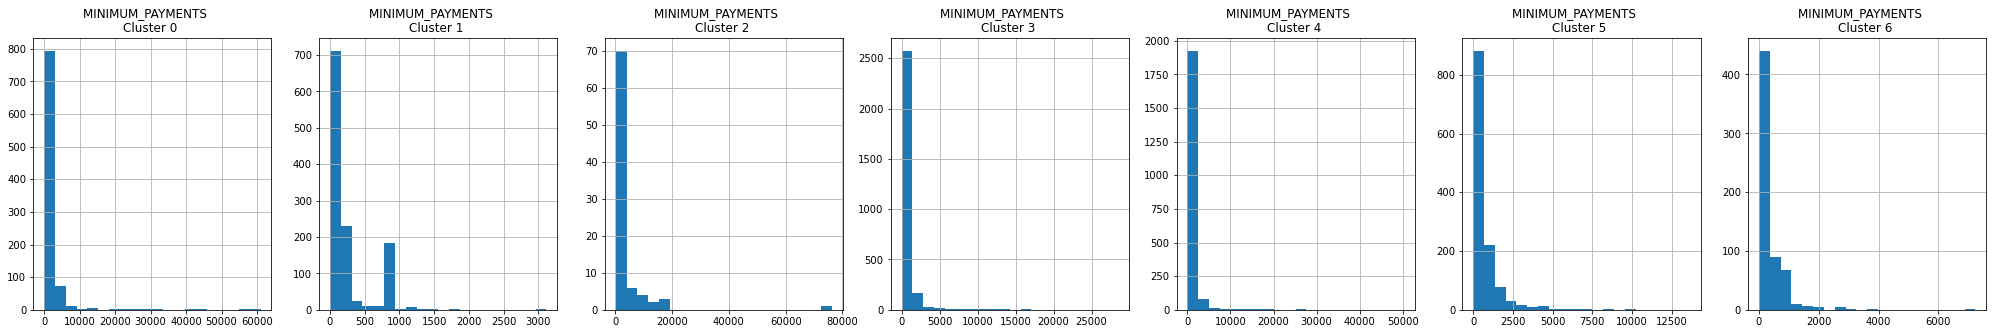

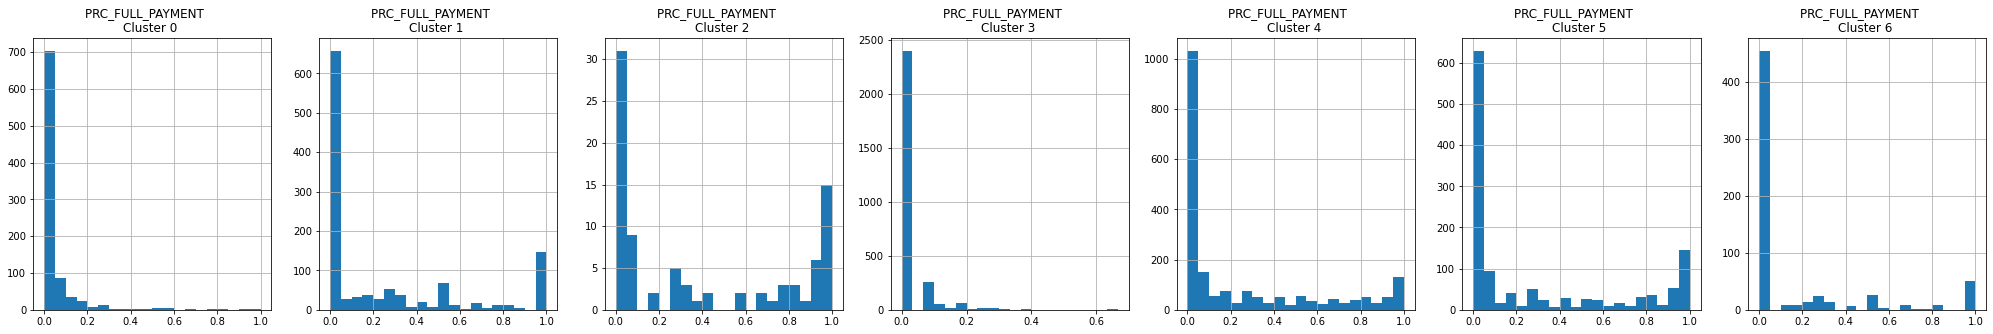

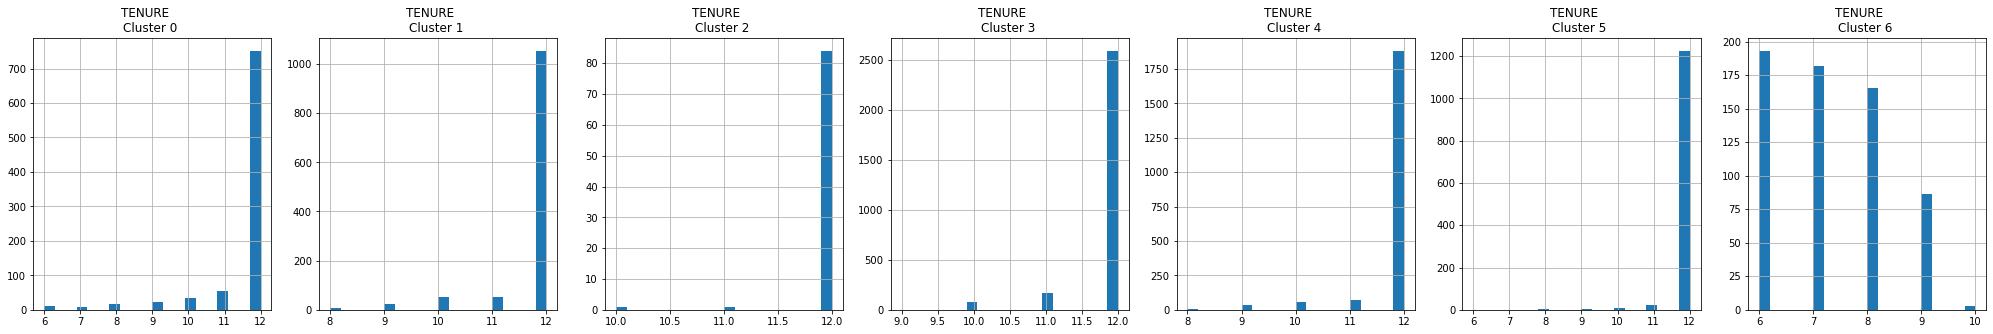

In [122]:
# Plotting the histograms associated with each cluster
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = df_cluster[df_cluster["CLUSTER"] == j]
        cluster[i].hist(bins = 20)
        plt.title("{}    \nCluster {} ".format(i,j))
  
    plt.show()


## Apply Principal Component Analysis 

Principle Component Analysis (PCA) is an unsupervised Machine Learning algorithm that performs dimensionality reduction. PCA identifies new features called 'components' that are composites of the uncorrelated input features. The reduction preserves the original information while allowing for a simpler representation.

In [129]:
# Specify the number of principal components and apply PCA to the 'df_scaled' array
pca = PCA(n_components = 2) # This gives us 2 components
principal_comp = pca.fit_transform(df_scaled) # Here we feed in the 'df_scaled' array
principal_comp # Visualizes/gives the array with only 2 components

array([[-1.68221646, -1.07644133],
       [-1.13828192,  2.50651565],
       [ 0.96972639, -0.38340519],
       ...,
       [-0.9262075 , -1.81079936],
       [-2.33654258, -0.65794374],
       [-0.55639255, -0.40038397]])

In [130]:
# Create a dataframe with two columns: pc1 and pc2
pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"])

# Display the first five rows
pca_df.head()

,pca1,pca2
0,-1.682216,-1.076441
1,-1.138282,2.506516
2,0.969726,-0.383405
3,-0.873660,0.043078
4,-1.599421,-0.688548


In [131]:
# Let's now concatenate the cluster labels to the 'pca_df' dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis = 1)

# Display the first five rows
pca_df.head()

,pca1,pca2,cluster
0,-1.682216,-1.076441,3
1,-1.138282,2.506516,0
2,0.969726,-0.383405,5
3,-0.873660,0.043078,3
4,-1.599421,-0.688548,3


## Visualization of Clusters

We can plot our clusters after performing PCA.

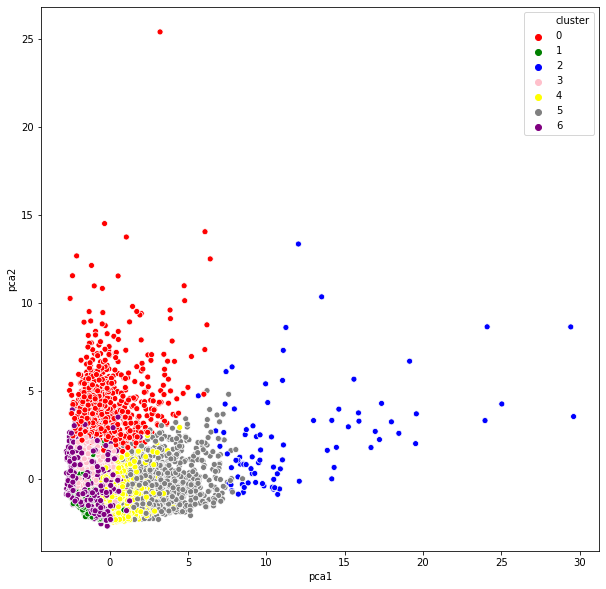

In [133]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

The plot above visualizes the 7 different clusters of customers.

## Results and Summary

In this project I attempted to segment a bank's credit card customers into distinct groups with shared features. Grouping the customers in this way will assist the bank's efforts to develop a set of tailored marketing advertisement campaigns. In order to accomplish this task, I employed several machine learning algorithms. Specifically, I used *K-means clustering* and *Principal component Analysis*.

The project proceeded in several steps. First, I cleaned and prepared the credit card customer data. Second, I performed exploratory analysis. Third, I determined the optimal number of clusters using the *elbow method*. Fourth, I trained and applied the *K-means clustering* algorithm. Sixth, I identified several groups within the clusters that were of primary interest. Seventh, I leveraged *Principal Component Analysis* to carry out dimensionality reduction. Finally, I visualized the resulting clusters.

The results of the analysis is as follows. After applying the elbow method, I determined that the optimal number of clusters was 7. Once I had employed the K-means algorithm and segemented the customers, I was able to identify the four interest groups: the **lucrative group**, the **conservative** group, the **top-tier** group, and the **developing group**. Finally, I sucessfully implemented Principle Component Analysis and created 2 components. I then visualized the clusters using those two componetns.